In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900) #native simulation
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True) #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True) #snbin simulation


Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/outputs/Bubble_v2_5e-14_linear_full_900_flux.fits
no.of bins: 169


In [3]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

#voronoibin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim

#radbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=True, vorbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #radbin sim

#snbin sim
#u.fitlines(sys_vel=20, lines0= np.array([9069,7320, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=True, rbinmax=260, drbin=15, loadfile=False, plot=False) #voronoi sim


Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '7331' '6731' '6717' '6584' '6563' '6548'
 '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729'
 '3726']
linefitfile: Bubble_v2_5e-14/Bubble_v2_5e-14_linefits.fits


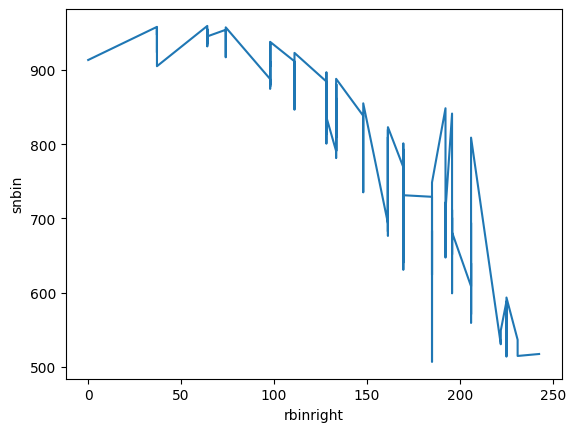

In [4]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)


78
[[ 1.88423089e-14  8.18830985e-15 -1.22387435e-14 ...  2.06153060e-15
   1.64401440e-15 -7.84160317e-15]
 [ 1.00003319e-14 -2.76717299e-15  3.19812599e-15 ... -3.69921353e-15
  -2.96248757e-14 -3.90101617e-15]
 [-1.83954143e-14 -4.03355904e-15 -4.18680559e-14 ... -5.11214400e-16
  -9.01912890e-15 -1.12372058e-14]
 ...
 [ 1.52496153e-14  4.76286660e-14 -1.99361469e-14 ...  5.28573123e-16
  -1.11238669e-14 -4.97769720e-14]
 [ 2.47284442e-14 -4.92944444e-14  3.74178939e-14 ...  1.15654641e-14
  -3.67776014e-14 -2.21244684e-14]
 [ 8.69585369e-15  1.08212203e-14  6.88630468e-14 ... -6.23591331e-15
   1.27269654e-15  1.95426747e-14]]


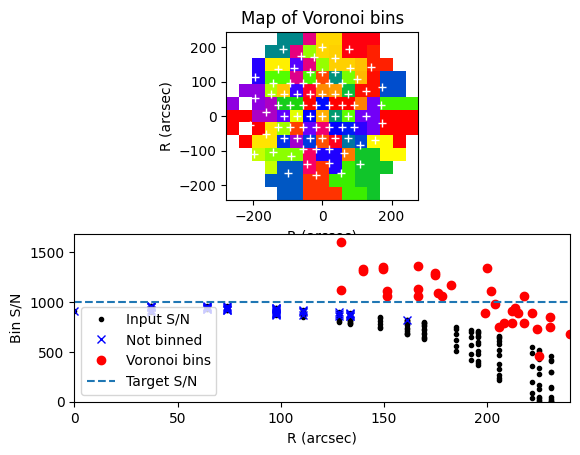

In [5]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [6]:
u.runpyneb(niter=4, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:354: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:373: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:389: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:408: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:425: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:443: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:457: RuntimeWarning: Mean of empty

In [7]:
#Printing "T0_new:",T0_new, "r_new:", r_new, "a_new:", a_new, "integral:", integral
u.projectedTe(n_steps=10)
#print(u.vals[1], u.vals[8], len(u.vals[8]), len(u.integral_values), len(u.r0_unique))
print(u.integral_values)

[[], [3959.0000000002, 6137.284621949567, 6552.586804442351, 6552.58680444235, 6137.284621949567, 3959.0000000002], [6137.284621949414, 6552.586804441547, 6552.586804441547, 6137.284621949414], [3959.000000000201, 6137.284622201772, 6552.586805760997, 6552.586805760997, 6137.284622201772, 3959.000000000201], [6137.284622201547, 6552.58680575982, 6552.586805759821, 6137.284622201547], [6137.284621949419, 6552.5868044415765, 6552.5868044415765, 6137.284621949416], [3959.0, 6137.284621949265, 6552.586804440773, 6552.586804440773, 6137.284621949265, 3959.0], [3958.9999999999995, 6309.292455326722, 6112.151270080791, 6138.52316916213, 6181.386282401026, 6181.386282401026, 6138.52316916213, 6112.151270080791, 6309.292455326722, 3958.9999999999995], [6209.598117576498, 6123.871043094401, 6215.108376420471, 6328.150784580028, 6328.150784580028, 6215.108376420471, 6123.871043094401, 6209.598117576497], [6309.29245532694, 6112.151270080791, 6138.523169162046, 6181.3862824007965, 6181.38628240079

/home/amrita/LVM/lvmnebular/lvmnebular.py:758: RuntimeWarning: invalid value encountered in arccos
  theta_max=np.arccos(i/np.max(r0_unique))


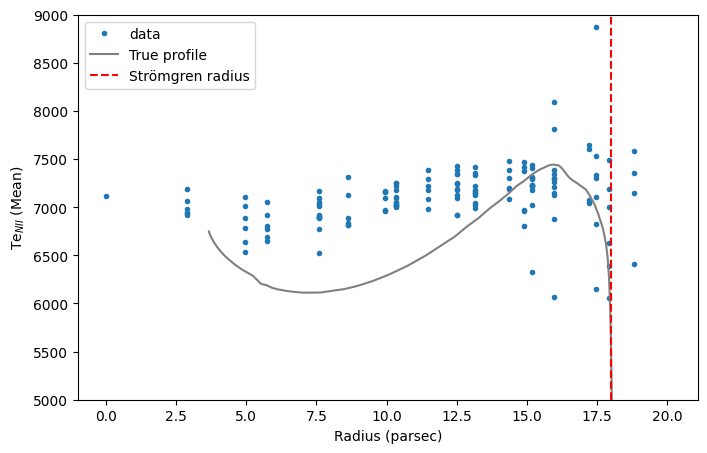

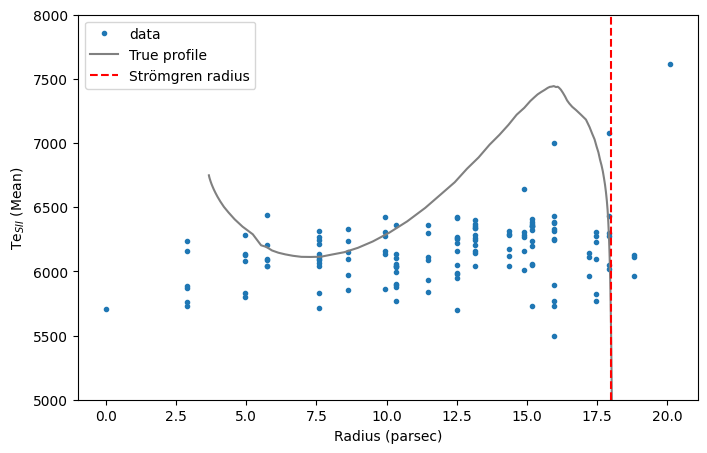

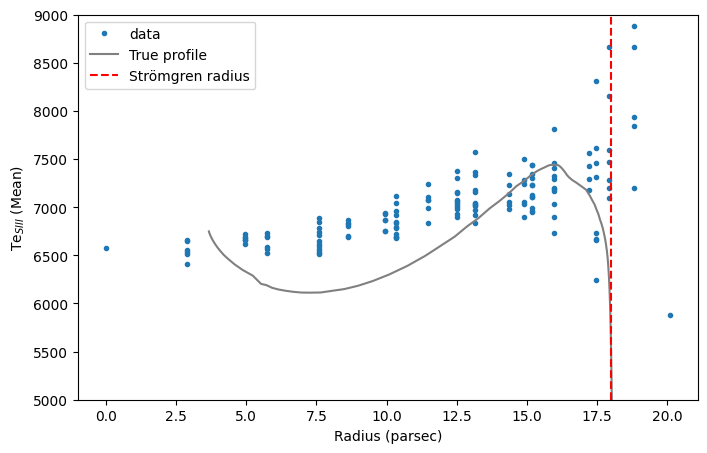

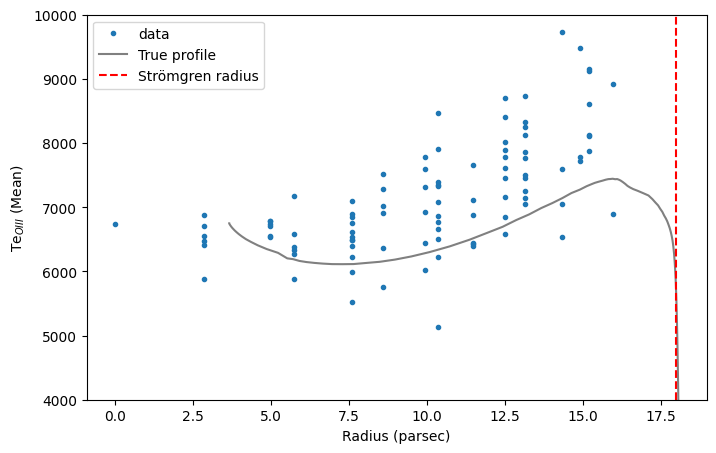

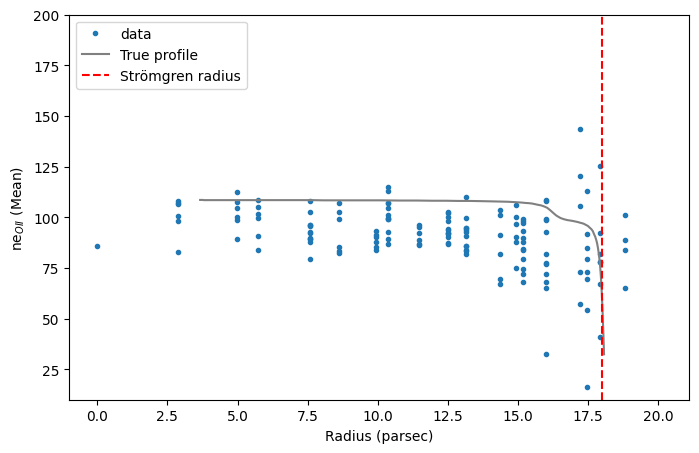

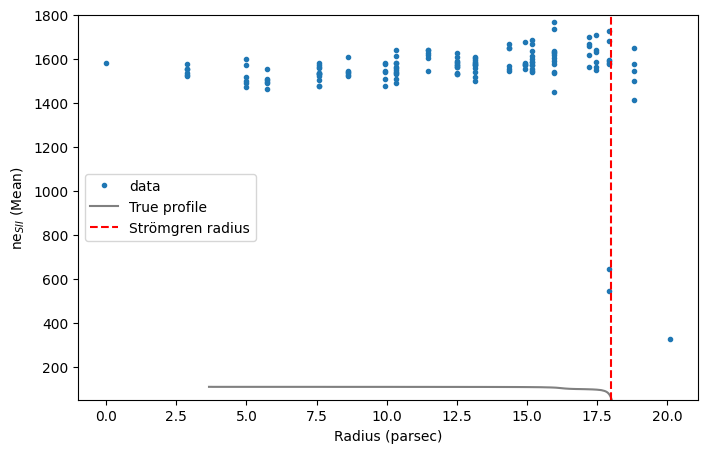

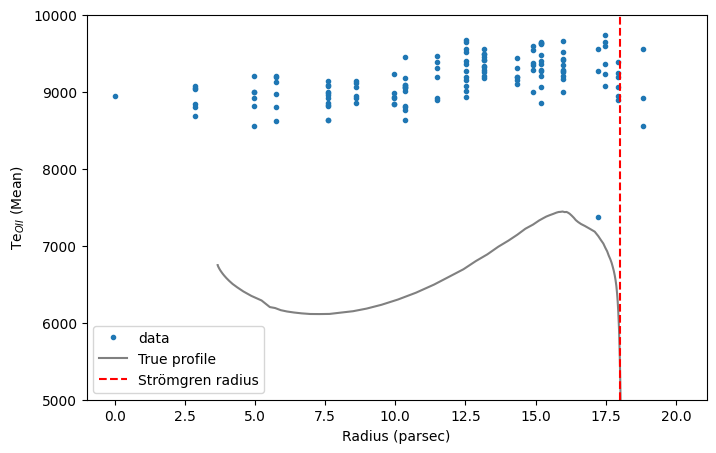

In [9]:
u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], 5000 , 9000, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], 5000 , 9000, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], 4000 , 10000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neO2'], u.vals[2], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['neS2'], u.vals[2], 50 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], 5000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=False,  snbin=False)

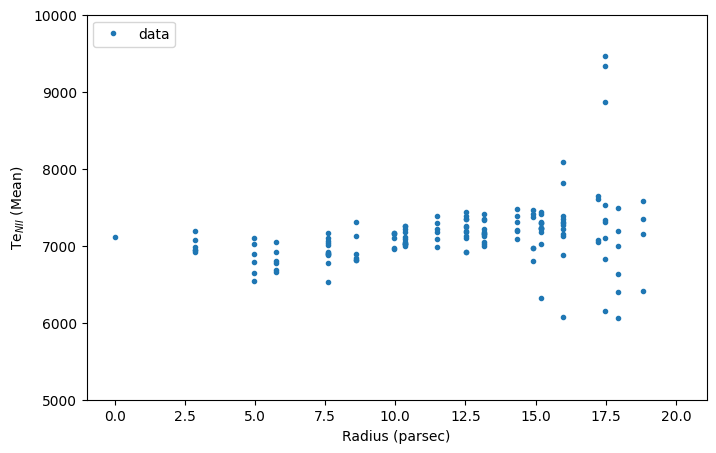

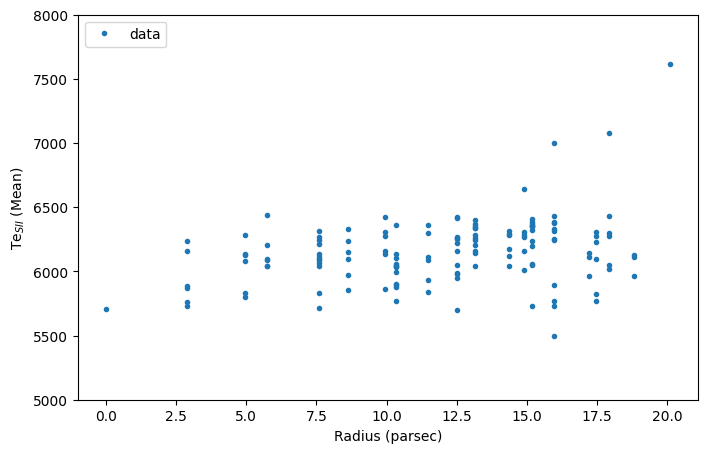

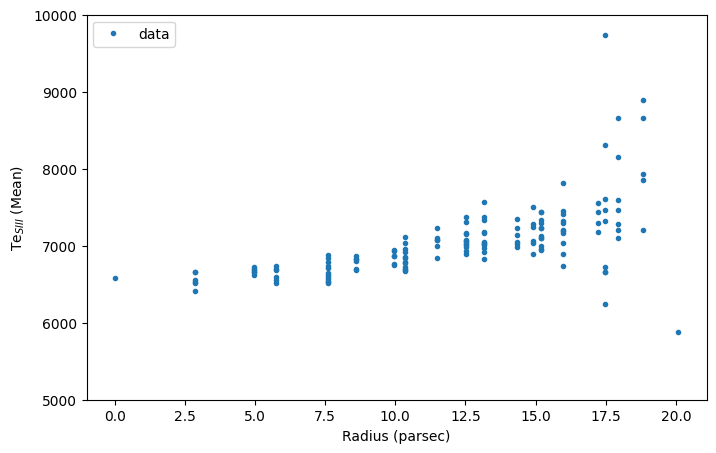

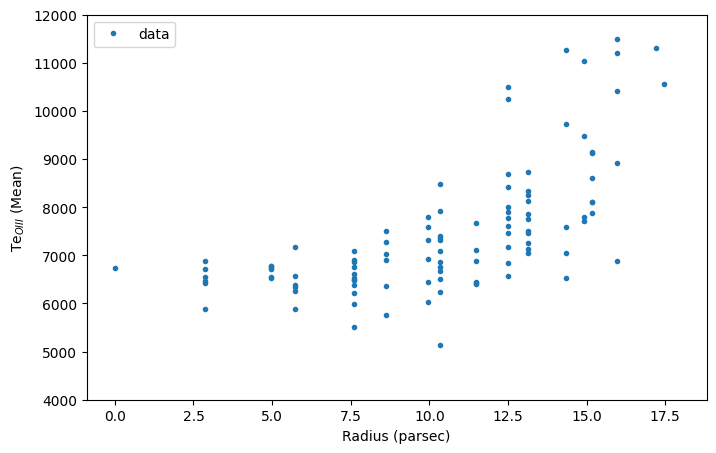

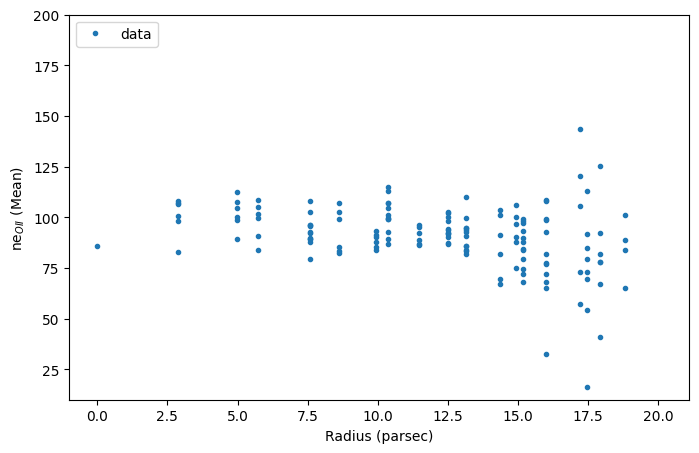

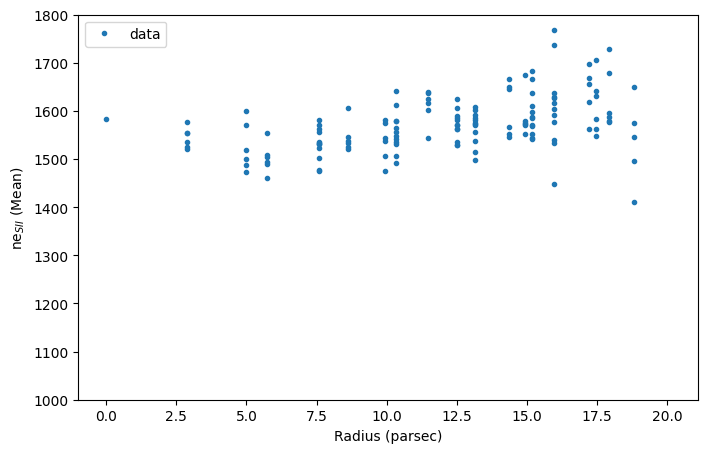

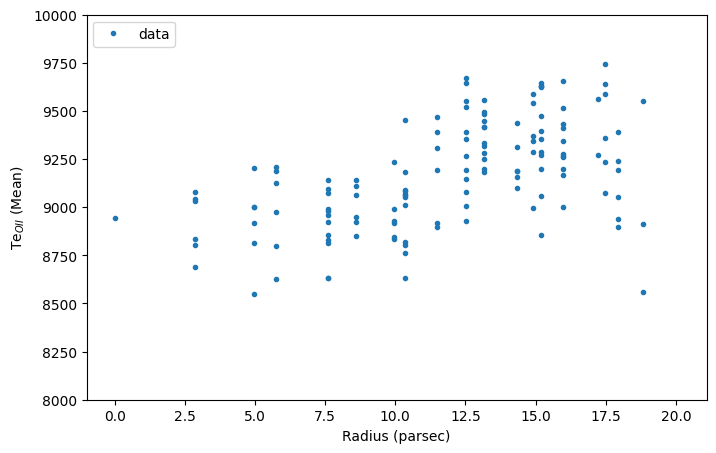

In [10]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)



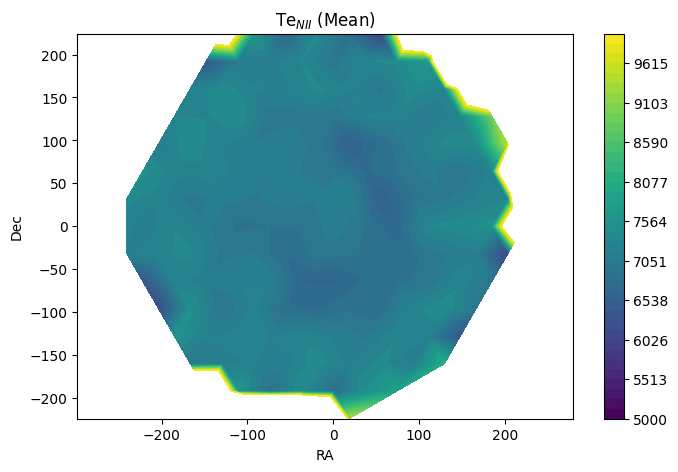

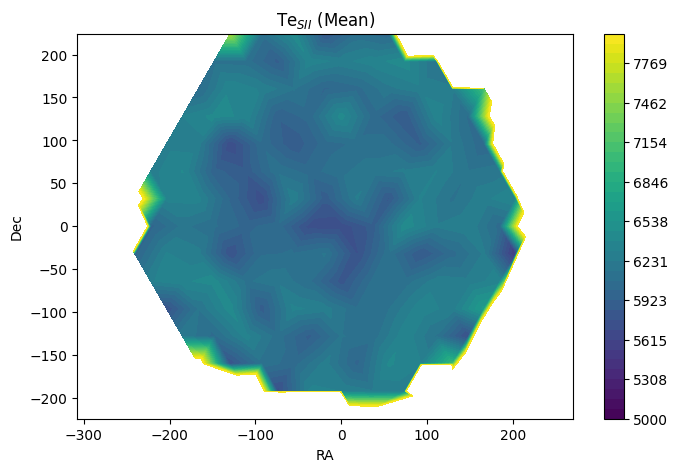

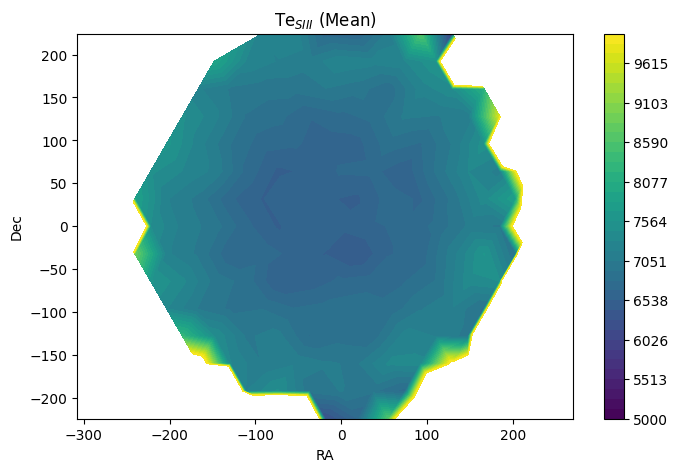

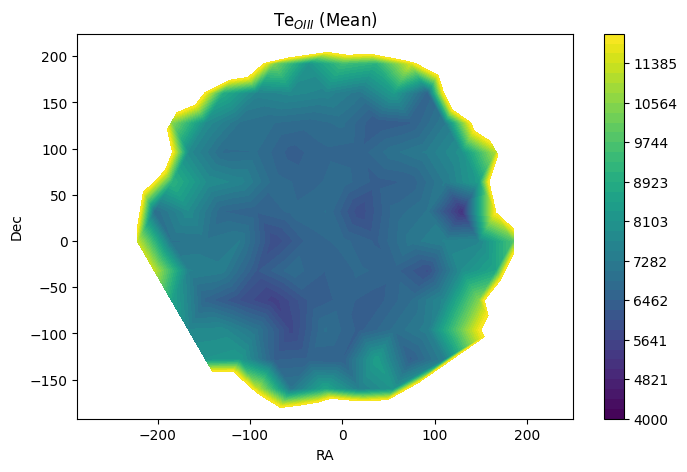

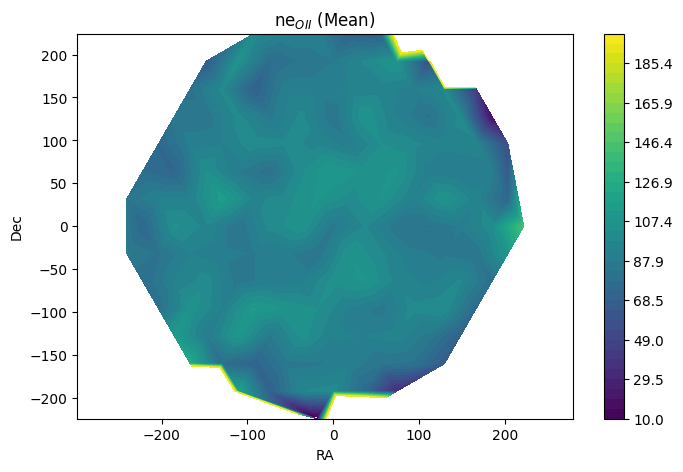

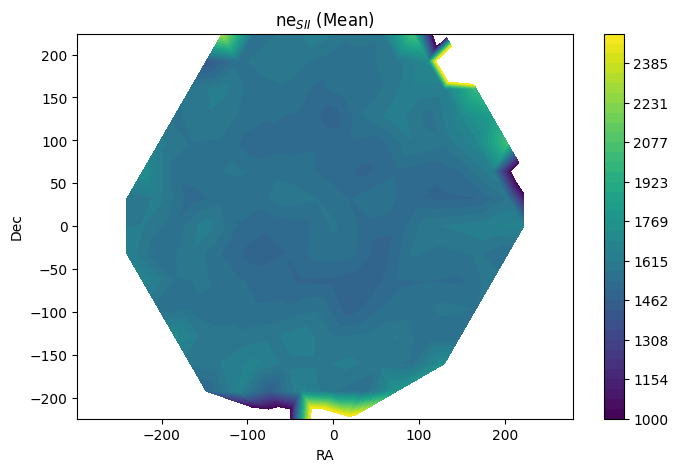

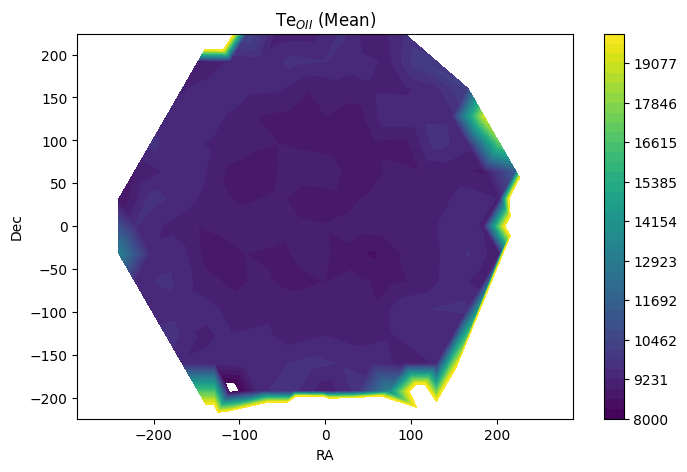

In [12]:
#Make plot profiles
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)




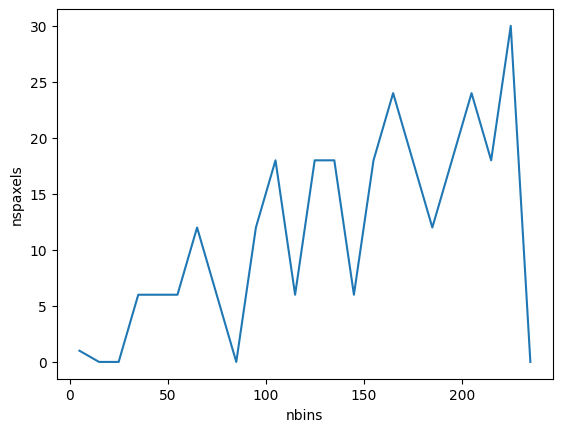

In [11]:
u.radialbin(250, 10)

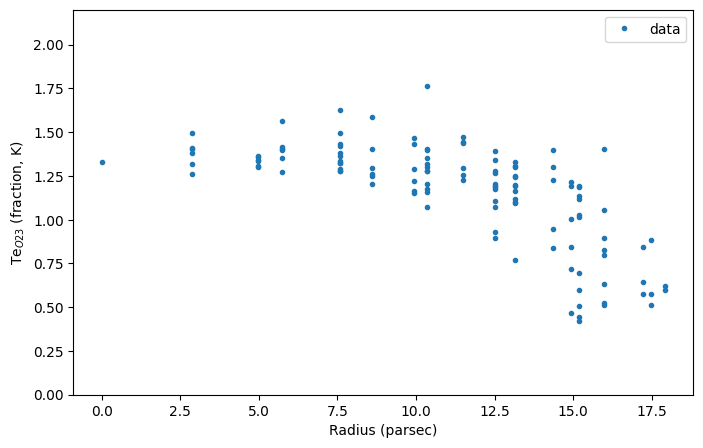

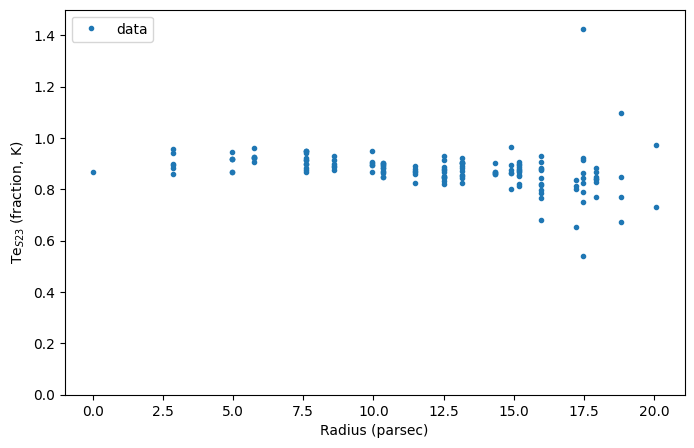

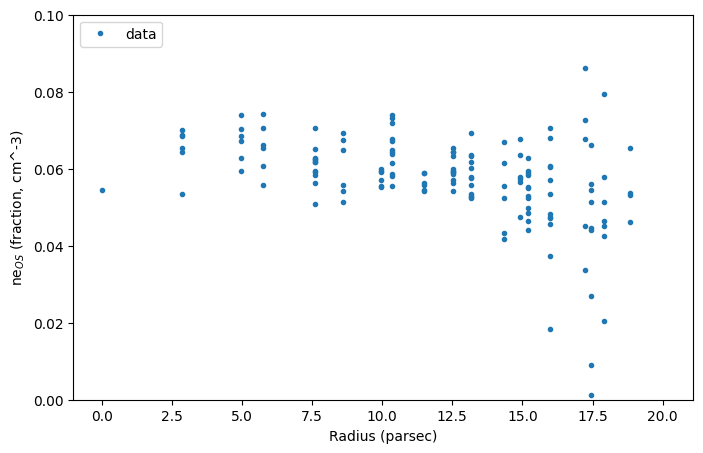

In [13]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

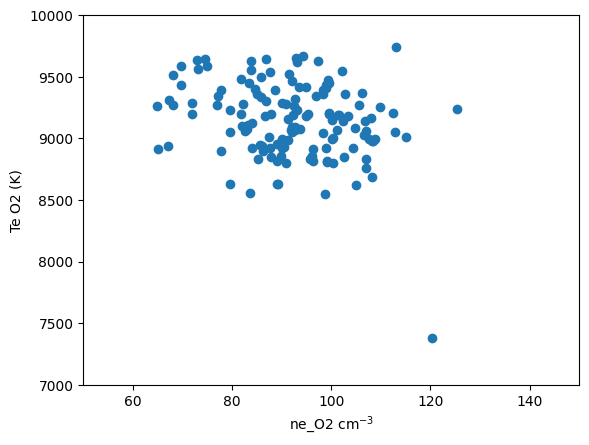

In [17]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 cm$^{-3}$')
plt.ylabel('Te O2 (K)')
plt.ylim(7000, 10000)
plt.xlim(50, 150)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

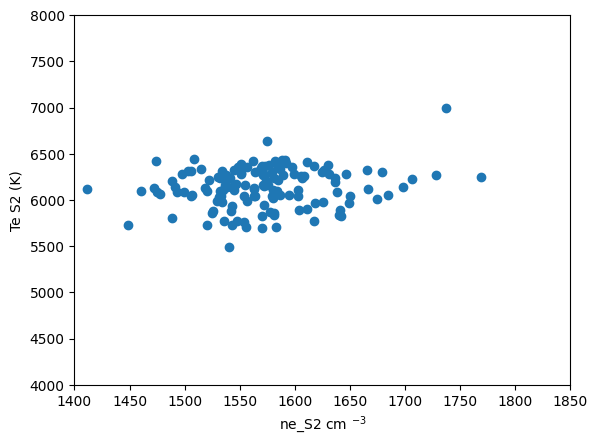

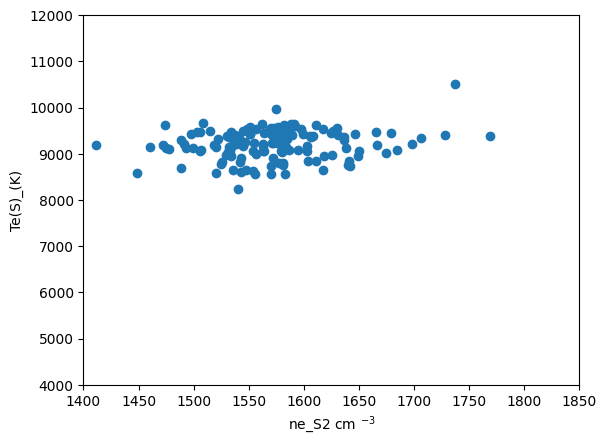

In [18]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2'])
plt.xlabel('ne_S2 cm $^{-3}$')
plt.ylabel('Te S2 (K)')
plt.ylim(4000, 8000)
plt.xlim(1400, 1850)
title='Te vs ne for SII.png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

fig, ax=plt.subplots()
ax.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2']+u.linefitdict['TeS2']/2 )
ax.set_xlabel('ne_S2 cm $^{-3}$')
ax.set_ylabel('Te(S)_(K)')
ax.set_ylim(4000, 12000)
ax.set_xlim(1400, 1850)
title='Te(S) vs ne(SII).png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=200)



In [ ]:
# Reprducing plots from paper 2 on DM chemical abundance determination
TO2=np.divide(2,(u.linefitdict['TeO3']**-1 +0.8))
print(u.linefitdict['TeO3'], u.linefitdict['TeO2'], TO2)